## Step 1: Load Model and Data

In [4]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt

# Load classifier
model = joblib.load("../models/failure_classifier.pkl")

# Load windowed test data from previous notebook (or recompute if needed)
# Recreate X, y for test if necessary:
# X_train, X_test, y_train, y_test = train_test_split(...) as done earlier

# We'll use X_test and y_test from the previous notebook
import joblib

# Load saved test set
X_test, y_test = joblib.load("../models/test_data.pkl")


## Step 2: Initialize SHAP Explainer

In [5]:
# Use TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


##  Step 3: Global Feature Importance

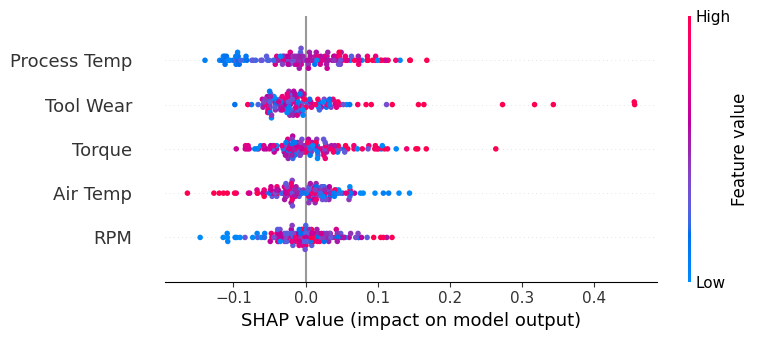

<Figure size 640x480 with 0 Axes>

In [8]:
feature_names = ['Air Temp', 'Process Temp', 'RPM', 'Torque', 'Tool Wear']

# Class 1 = Failure
shap.summary_plot(shap_values[1], X_test, feature_names=feature_names)

#save the plot
plt.savefig("../outputs/visualizations/shap_summary_plot.png", dpi=300, bbox_inches='tight')


## Step 4: Explain a Single Window

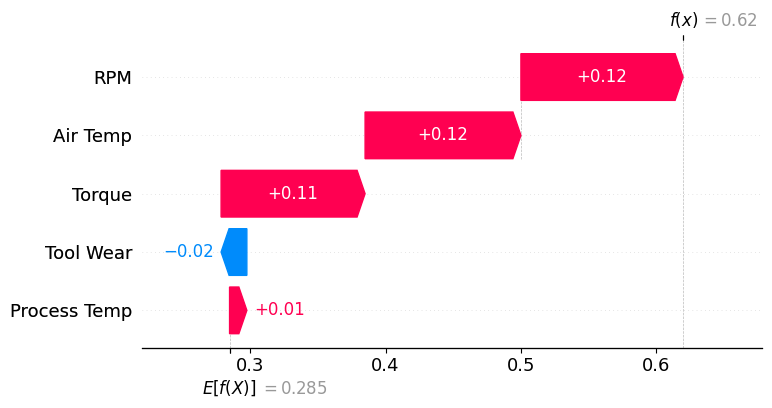

In [ ]:
# Pick an instance where model predicted failure (1)
for i in range(len(X_test)):
    if model.predict([X_test[i]])[0] == 1:
        break

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test[i], feature_names=feature_names)

# Waterfall plot for instance i
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[1][i], feature_names=feature_names)

# Save SHAP values if needed for future UI dashboard
np.save("../outputs/reports/shap_values_failure_class.npy", shap_values[1])

#save the plot
plt.savefig("../outputs/visualizations/shap_waterfall_plot.png", dpi=300, bbox_inches='tight')
# Save the SHAP summary plot as an image
plt.savefig("../outputs/visualizations/shap_force_plot.png", dpi=300, bbox_inches='tight')
